In [1]:
import pandas as pd
import numpy as np
import netCDF4
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib import colors

#projekcia citana zo shapefile
import geopandas as gpd
import pyproj 

import h5py
from pyproj import Proj, transform
import csv

from matplotlib.colors import from_levels_and_colors
import matplotlib

/home/p6001/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [9]:
#RIO 
#cmaq grid
grid_CMAQ=netCDF4.Dataset('/data/mala/GRIDCRO2D_01012015.nc')
lon=np.array(grid_CMAQ.variables['LON'][0,0,2:101,2:180])
lat=np.array(grid_CMAQ.variables['LAT'][0,0,2:101,2:180])
#rio hdf5 file
file = h5py.File('/media/sf_Share/LifeIP_results_RIO/LifeIP_results_RIO/PM10/2015_RIO_output_daily_average/rio_pm10_da_clc12_47x47_20150101-20151231.h5','r')
# model cmaq
model_CMAQ=netCDF4.Dataset('/media/sf_Share/TERKA/opravene//LIFEIP_Small_{0}_2015'.format('PM'))
#rio grid with X2, Y2 coordinates
grid=gpd.read_file('/media/sf_Share/LifeIP_results_RIO/grid/grid/CAMx_d02.shp')

############pozor na aa  ###########################################################################################
aa=1
##########################################################################################################################
a=list(file.keys())

# pozrie do hlavnych priecinkov a ich prvych podpriecinkov
priecinky={}
for i in a:
    b=list(file[i])
    priecinky[i]=b
    
    
data={}   
keys=priecinky.keys()
for i in keys:
    for j in priecinky[i]:
        atr=file['{0}/{1}'.format(i,j)].attrs.keys()
        data['{0}/{1}'.format(i,j)]=file['{0}/{1}'.format(i,j)]


#rio value 1:102,1:180
rio_daily=np.array(data['grid/value'][:])
rio_daily=np.reshape(rio_daily,(101,179,365))[1:100,1:]

#rio annual average
rio_ann=np.empty((99,178))
rio_ann=np.average(rio_daily[:,:,:], axis=2)

In [11]:
rio_pocet_prekrocen=np.zeros([99,178])

In [13]:
for i in range(0,rio_daily.shape[0]):
    for j in range(0,rio_daily.shape[1]):
        for day in range(0,rio_daily.shape[2]):
            if rio_daily[i,j,day] > 50:
               rio_pocet_prekrocen[i,j] += 1             
            

In [17]:
mapb=Basemap(projection='lcc',lat_1=46.24470138549805,lat_2=46.24470138549805,lat_0=48.7,lon_0=19.7,width=425780,height=216351,resolution='h')
koef=netCDF4.Dataset('/data/transboundary/em_koef')['koef'][2:101,2:180]
facSLO=(1-koef)    
plt.rcParams['figure.figsize'] = 15,8
plt.rcParams.update({'font.size': 15})
levels=[0,1,5,10,15,20,25,30,35,40,55,70]
colors_m=['w','darkblue','blue','royalblue','deepskyblue','limegreen','yellow','orange','red','brown','black']
cmap, norm = from_levels_and_colors(levels,colors_m)

In [23]:
tzp2015=47.3566535
tzp2017=43.79105904
tzp2020=40.77312298
tzp2030=35.89704245

coef2017=tzp2017/tzp2015
coef2020=tzp2020/tzp2015
coef2030=tzp2030/tzp2015

In [27]:
rio_pocet_prekrocen2017=np.zeros([99,178])
rio_pocet_prekrocen2020=np.zeros([99,178])
rio_pocet_prekrocen2030=np.zeros([99,178])
rio_daily2017=coef2017*rio_daily
rio_daily2020=coef2020*rio_daily
rio_daily2030=coef2030*rio_daily
for i in range(0,rio_daily.shape[0]):
    for j in range(0,rio_daily.shape[1]):
        for day in range(0,rio_daily.shape[2]):
            if rio_daily2017[i,j,day] > 50:
               rio_pocet_prekrocen2017[i,j] += 1 
            if rio_daily2020[i,j,day] > 50:
               rio_pocet_prekrocen2020[i,j] += 1 
            if rio_daily2030[i,j,day] > 50:
               rio_pocet_prekrocen2030[i,j] += 1 

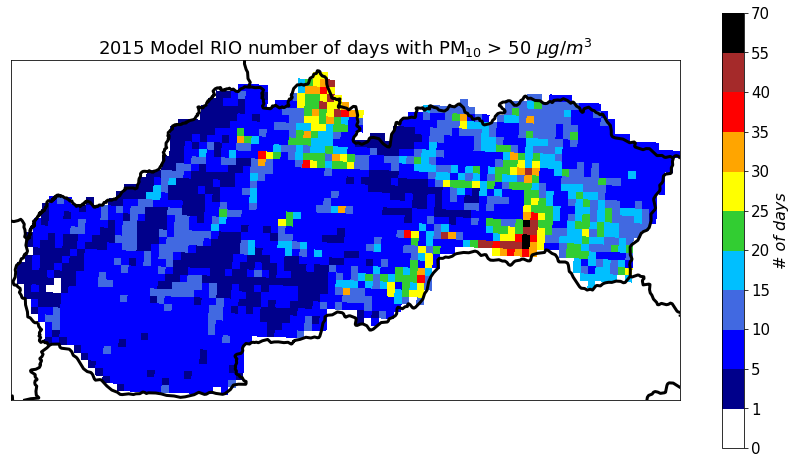

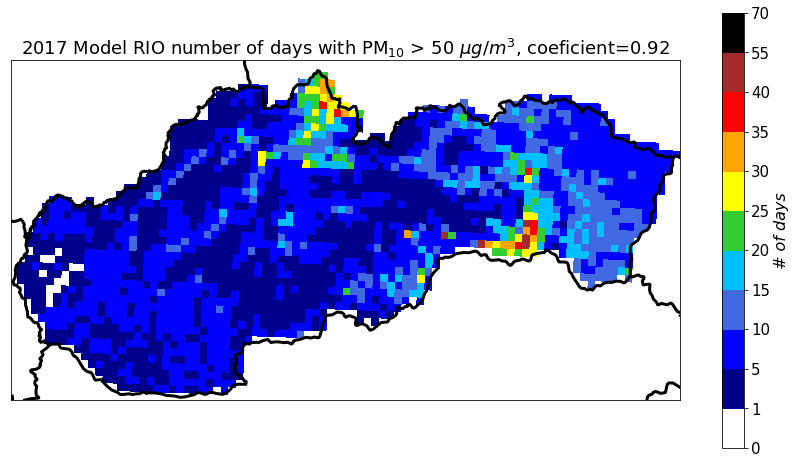

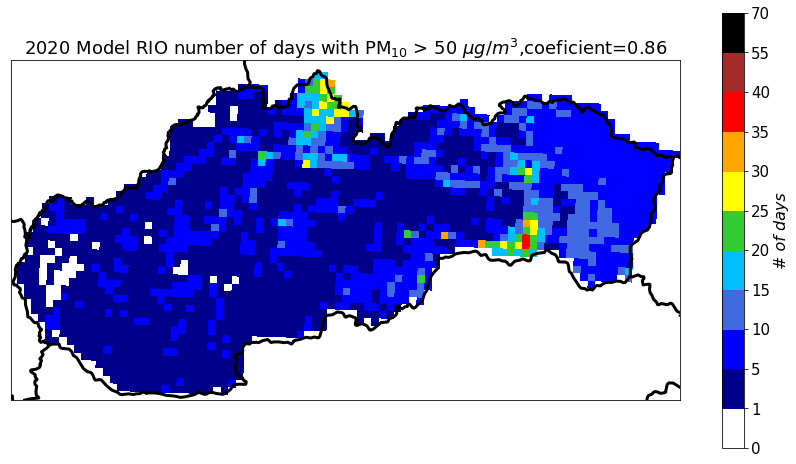

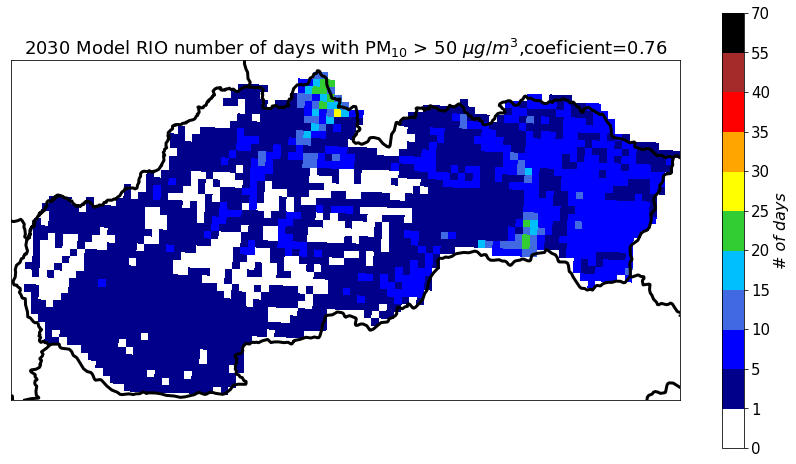

In [32]:
mapb.drawcountries(linewidth=3)
b=mapb.pcolormesh(lon,lat,facSLO*rio_pocet_prekrocen,latlon=True,cmap=cmap, norm=norm)
    
cb=plt.colorbar(b,label='# of days')
cb.set_ticks(levels)
font = matplotlib.font_manager.FontProperties( style='italic', size=16)
cb.ax.yaxis.label.set_font_properties(font)
plt.title('2015 Model RIO number of days with PM$_{10}$ > 50 $\mu g/m^3$')

#plt.savefig('/media/sf_Share/prezentacia_seminar_OMKO/model_RIO_PM10_por', dpi=300, bbox_inches='tight')
plt.show()
plt.close()
####################################################################################
mapb.drawcountries(linewidth=3)
b=mapb.pcolormesh(lon,lat,facSLO*rio_pocet_prekrocen2017,latlon=True,cmap=cmap, norm=norm)
    
cb=plt.colorbar(b,label='# of days')
cb.set_ticks(levels)
font = matplotlib.font_manager.FontProperties( style='italic', size=16)
cb.ax.yaxis.label.set_font_properties(font)
plt.title('2017 Model RIO number of days with PM$_{10}$ > 50 $\mu g/m^3$,'+' coeficient={0:.2f}'.format(coef2017))

#plt.savefig('/media/sf_Share/prezentacia_seminar_OMKO/model_RIO_PM10_por', dpi=300, bbox_inches='tight')
plt.show()
plt.close()
#################################################################################
mapb.drawcountries(linewidth=3)
b=mapb.pcolormesh(lon,lat,facSLO*rio_pocet_prekrocen2020,latlon=True,cmap=cmap, norm=norm)
    
cb=plt.colorbar(b,label='# of days')
cb.set_ticks(levels)
font = matplotlib.font_manager.FontProperties( style='italic', size=16)
cb.ax.yaxis.label.set_font_properties(font)
plt.title('2020 Model RIO number of days with PM$_{10}$ > 50 $\mu g/m^3$,'+'coeficient={0:.2f}'.format(coef2020))

#plt.savefig('/media/sf_Share/prezentacia_seminar_OMKO/model_RIO_PM10_por', dpi=300, bbox_inches='tight')
plt.show()
plt.close()
#################################################################################
mapb.drawcountries(linewidth=3)
b=mapb.pcolormesh(lon,lat,facSLO*rio_pocet_prekrocen2030,latlon=True,cmap=cmap, norm=norm)
    
cb=plt.colorbar(b,label='# of days')
cb.set_ticks(levels)
font = matplotlib.font_manager.FontProperties( style='italic', size=16)
cb.ax.yaxis.label.set_font_properties(font)
plt.title('2030 Model RIO number of days with PM$_{10}$ > 50 $\mu g/m^3$,'+'coeficient={0:.2f}'.format(coef2030))

#plt.savefig('/media/sf_Share/prezentacia_seminar_OMKO/model_RIO_PM10_por', dpi=300, bbox_inches='tight')
plt.show()
plt.close()
#################################################################################